### Visualización de datos

Visualización de datos una vez están limpios y antes de colocar las flagas

In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os as os
import math

#TODO Introducir el dataset con el que se vaya a trabajar
station = 'vernadsky'
df = pd.read_csv(f'data_{station}/{station}_clean.csv')
cols = [col for col in df.columns]

# date,temp,skt,dir,vel,hr,prec,pres
new_order = ['date', 'temp', 'dir', 'vel', 'hr',  'pres']
df = df.reindex(columns=new_order)

df['date'] = pd.to_datetime(df['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201208 entries, 0 to 201207
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    201208 non-null  datetime64[ns]
 1   temp    201125 non-null  float64       
 2   dir     201192 non-null  float64       
 3   vel     196441 non-null  float64       
 4   hr      122123 non-null  float64       
 5   pres    201166 non-null  float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 9.2 MB


temp
dir
vel
hr
pres


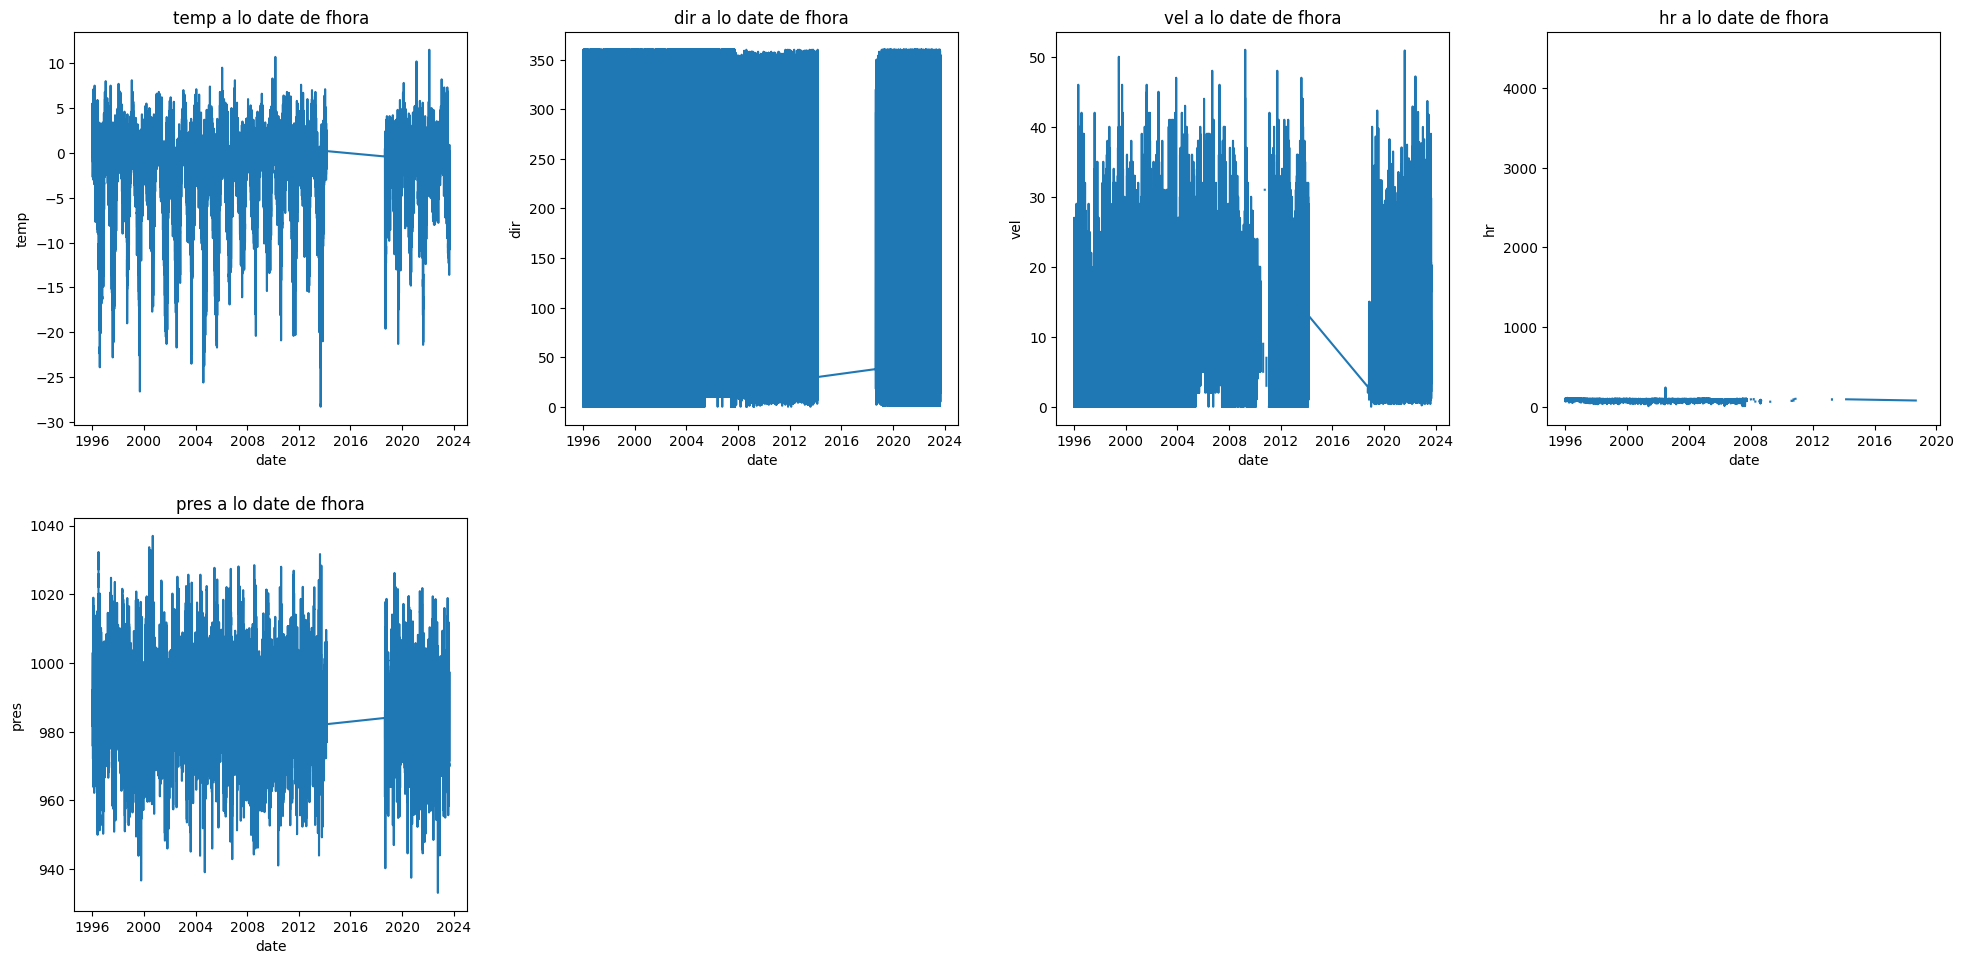

In [14]:
import matplotlib.dates as mdates

num_cols = len(df.columns) - 1  # Restamos 1 para excluir la columna 'fhora'
num_rows = math.ceil(num_cols / 4)  # Redondea hacia arriba para obtener el número de filas necesarias

fig, axes = plt.subplots(nrows=num_rows, ncols=4, figsize=(20, 5 * num_rows))  # Ajusta el tamaño de la figura según el número de filas


# Aplanar el array de ejes para poder iterar sobre él
axes = axes.flatten()

# Iterar sobre las columnas (excluyendo 'fhora') y generar gráficos
for ax, col in zip(axes, df.columns.drop('date')):
    print(col)
    ax.plot(df['date'], df[col])
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Formato de año

    ax.set_xlabel('date')
    ax.set_ylabel(col)
    ax.set_title(f'{col} a lo date de fhora')

# Eliminar los ejes sobrantes si el número de columnas no es múltiplo de 4
if num_cols < len(axes):
    for ax in axes[num_cols:]:
        ax.remove()
        
plt.savefig(f'resource/clean_{station}.png')
plt.tight_layout(pad=2.0)  # Ajusta el padding
plt.show()

### Una sola gráfica de una columna

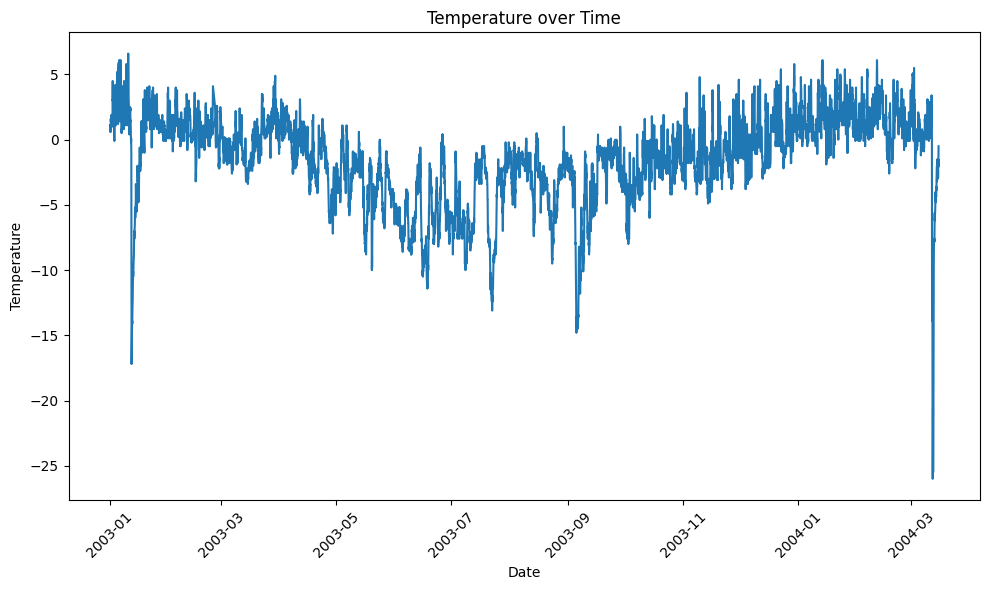

In [11]:
# Asumiendo que 'date' está en formato datetime y 'temp' es numérica
plt.figure(figsize=(10, 6))
sns.lineplot(x='date', y='temp', data=df)

plt.xlabel('Date')  # Etiqueta para el eje X
plt.ylabel('Temperature')  # Etiqueta para el eje Y
plt.title('Temperature over Time')  # Título de la gráfica

plt.xticks(rotation=45)  # Rotar las etiquetas del eje X si es necesario
plt.tight_layout()  # Ajustar el layout para evitar solapamientos

plt.savefig(f'test_{station}.png')

plt.show()